In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import RobustScaler
from math import log2
from collections import Counter

In [128]:
# Load the data from the given path into a pandas DataFrame
data = pd.read_csv('titanic/train.csv')
test_data = pd.read_csv('titanic/test.csv')

In [129]:
# How many rows are there in the dataset, and what does this represent
data.shape[0]

891

In [130]:
test_data.shape[0]

418

In [131]:
# How many columns are in the dataset, and what does this represent
data.shape[1]

12

In [132]:
test_data.shape[1]

11

In [133]:
# Display the first 5 rows of the dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [134]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# How many passengers survived
data['Survived'].sum()

342

In [136]:
# Discuss the distributions of the variables using the describe() method for summary stats.
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [137]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


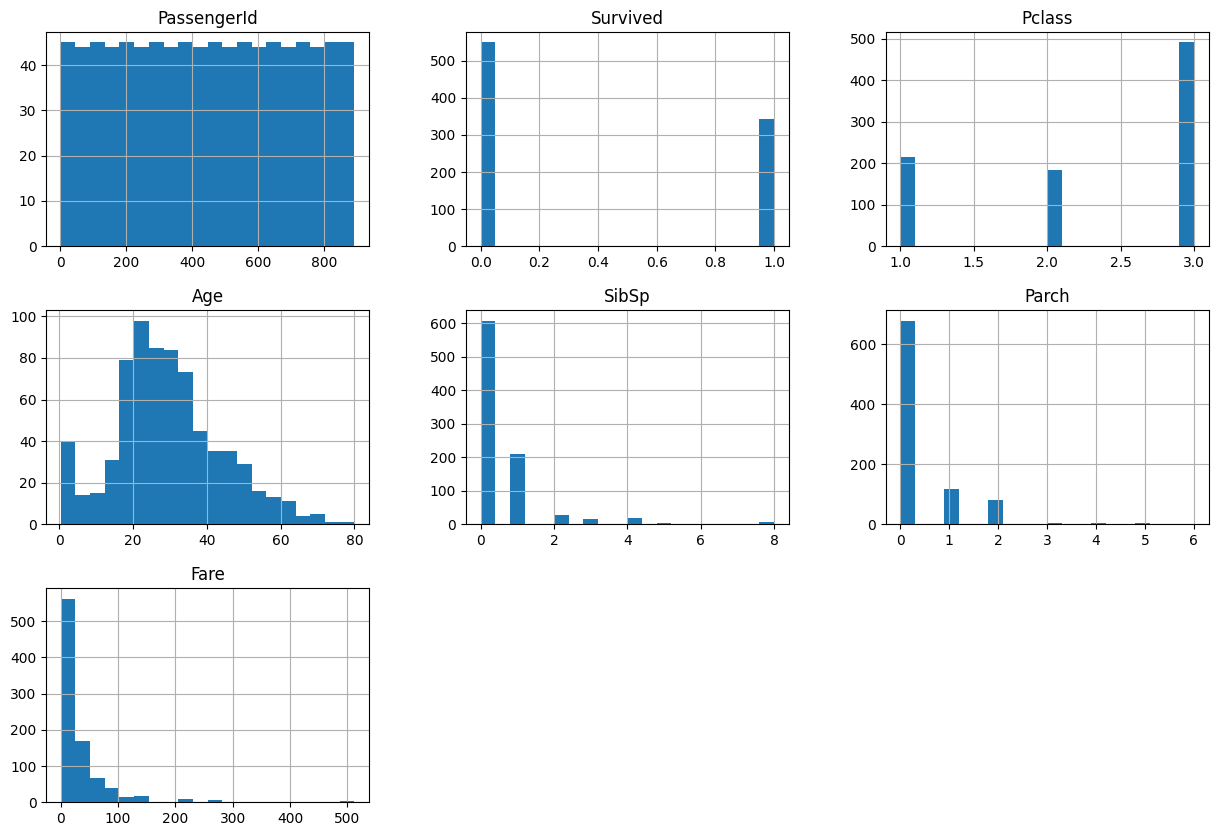

In [138]:
# Plot the variable distributions using histograms, bar plots, or boxplots
data.hist(bins=20, figsize=(15,10))
plt.show()

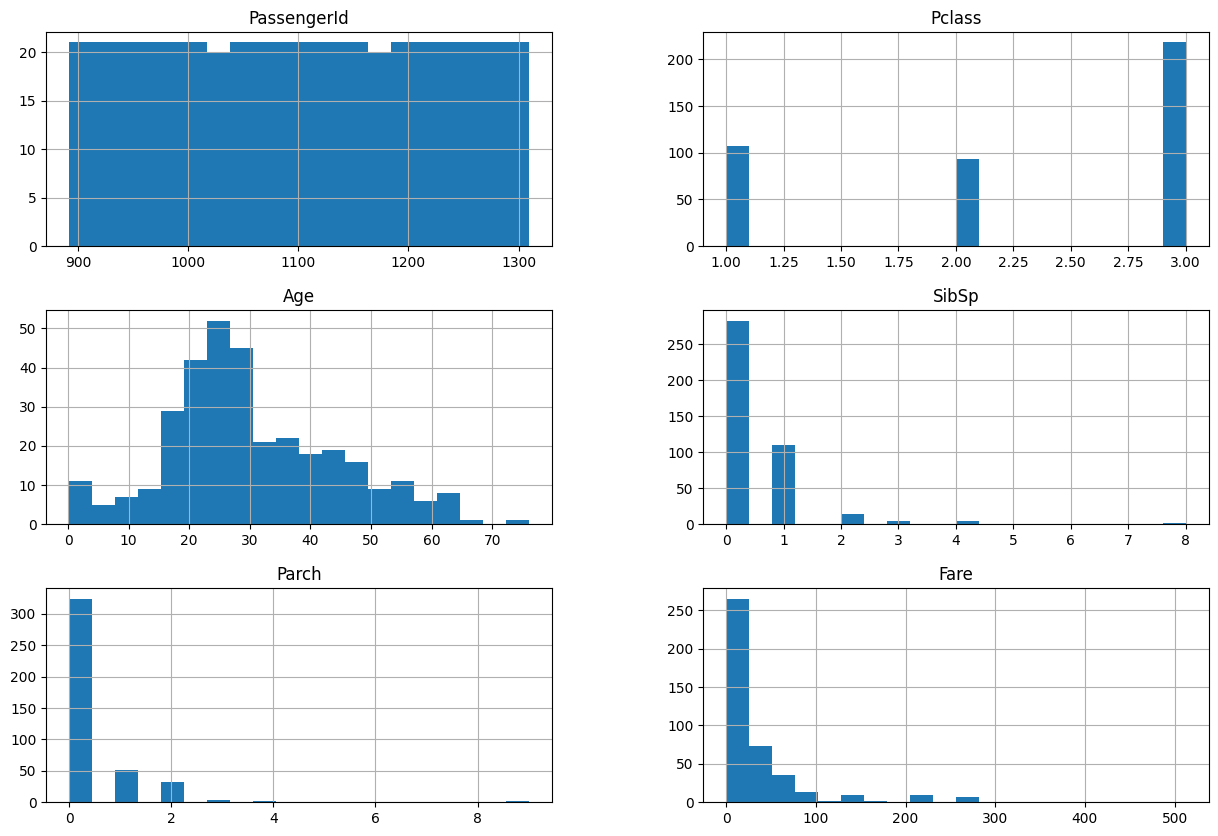

In [139]:
test_data.hist(bins=20, figsize=(15,10))
plt.show()

In [140]:
# Display information about the dataset, including the number of entries, non-null counts, and data types for each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [141]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [142]:
# Check for missing values in each column
missing_values = data.isnull().sum()

missing_values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [143]:
# Check for missing values in each column
missing_values_test = test_data.isnull().sum()

missing_values_test

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Display the names of the different variables included in the dataset. Give a brief description of each variable, and comment on its usefulness. What is the target variable?

- PassengerId: A unique identifier for each passenger. Useful for indexing but not for prediction.
- Survived: Indicates if a passenger survived (1) or not (0). This is the target variable.
- Pclass: Passenger class (1st, 2nd, or 3rd). Useful as it can represent socio-economic status.
- Name: Passenger's name. Not directly useful for prediction but can sometimes provide insights like titles (Mr., Mrs., etc.).
- Sex: Gender of the passenger (male or female). Useful as survival rates can vary by gender.
- Age: Age of the passenger. Important as survival chances can vary by age.
- SibSp: Number of siblings/spouses aboard. May be useful to understand family groups.
- Parch: Number of parents/children aboard. Similar to SibSp, useful for family grouping.
- Ticket: Ticket number. Generally not useful, although it might be indirectly correlated with fare or class.
- Fare: The fare paid by the passenger. Useful as it may correlate with socio-economic status.
- Cabin: Cabin number. Most values are missing; it may be dropped due to limited information.
- Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton). Useful as it might indicate regional differences in survival.

In [144]:
# Feature engineering function
def feature_engineering(df):
    # Handle missing values
    # Fill missing values with the median for 'Age' and 'Fare'
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Fare'].fillna(df['Fare'].median(), inplace=True)

    # Create a new column 'Cabin_assigned' to indicate whether a cabin was assigned (1 if assigned, 0 if missing)
    df['Cabin_assigned'] = df['Cabin'].notnull().astype(int)

    # Drop the 'Cabin' column as it has many missing values and we now have the 'Cabin_assigned' feature
    df.drop('Cabin', axis=1, inplace=True)

    # Fill missing values in the 'Embarked' column with the most common value (mode)
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

    # Family Size and IsAlone features
    # Create a new feature 'FamilySize' by adding 'SibSp' (siblings/spouses) and 'Parch' (parents/children) columns and adding 1 (to include the passenger)
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

    # Create an 'IsAlone' feature that is 1 if the passenger is alone (FamilySize is 1), otherwise 0
    df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

    # Ticket prefix feature
    # Extract the prefix from the 'Ticket' column by splitting on spaces and taking the first part if there is more than one part; otherwise, assign 'NoPrefix'
    df['TicketPrefix'] = df['Ticket'].apply(lambda x: x.split()[0] if len(x.split()) > 1 else 'NoPrefix')

    # Name length feature
    # Calculate the length of each passenger's name and store it in a new feature 'NameLength'
    df['NameLength'] = df['Name'].apply(len)

    # Fare and Age binning
    # Bin the 'Fare' column into 4 categories (1 to 4) using quantiles
    df['FareBin'] = pd.qcut(df['Fare'], 4, labels=[1, 2, 3, 4])

    # Bin the 'Age' column into 5 categories (1 to 5) based on specified age ranges
    df['AgeBin'] = pd.cut(df['Age'].astype(int), bins=[0, 16, 32, 48, 64, 80], labels=[1, 2, 3, 4, 5])

    # Title feature
    # Extract title from the 'Name' column by splitting on commas and periods, and then stripping any whitespace
    df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

    # Replace uncommon titles with more general categories to simplify the feature
    df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')

    # Drop columns that are not needed
    df.drop(['Name', 'Ticket'], axis=1, inplace=True)

    return df

In [145]:
# Apply feature engineering
data = feature_engineering(data)
test_data = feature_engineering(test_data)

In [146]:
# Count the number of columns after feature engineering
final_column_count = data.shape[1]
print("Number of columns after feature engineering:", final_column_count)

# Display the names of the columns to confirm which ones are present
print("\nColumns in the DataFrame after feature engineering:")
print(data.columns.tolist())

# Identify dropped columns (optional)
# List of original columns before feature engineering
initial_columns = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

# Determine which columns from the original list are no longer present in the DataFrame
dropped_columns = [col for col in initial_columns if col not in data.columns]
print("\nDropped columns:", dropped_columns)


Number of columns after feature engineering: 17

Columns in the DataFrame after feature engineering:
['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Cabin_assigned', 'FamilySize', 'IsAlone', 'TicketPrefix', 'NameLength', 'FareBin', 'AgeBin', 'Title']

Dropped columns: ['Name', 'Ticket', 'Cabin']


In [147]:
# Count the number of columns in test_data after feature engineering
final_column_count_test = test_data.shape[1]
print("Number of columns in test_data after feature engineering:", final_column_count_test)

# Display the column names to verify the structure
print("\nColumns in test_data after feature engineering:")
print(test_data.columns.tolist())

# Identify dropped columns (optional)
# List of original columns in the test set (it may not contain 'Survived')
initial_columns_test = ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

# Determine which columns from the original list are no longer present in test_data
dropped_columns_test = [col for col in initial_columns_test if col not in test_data.columns]
print("\nDropped columns in test_data:", dropped_columns_test)


Number of columns in test_data after feature engineering: 16

Columns in test_data after feature engineering:
['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Cabin_assigned', 'FamilySize', 'IsAlone', 'TicketPrefix', 'NameLength', 'FareBin', 'AgeBin', 'Title']

Dropped columns in test_data: ['Name', 'Ticket', 'Cabin']


In [148]:
# One-hot encode categorical variables for the training data
data = pd.get_dummies(data, columns=['Sex', 'Embarked', 'TicketPrefix', 'Title'], drop_first=True)

# One-hot encode categorical variables for the test data
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked', 'TicketPrefix', 'Title'], drop_first=True)

In [149]:
# Ensure test_data has the same columns as data by reindexing
test_data = test_data.reindex(columns=data.columns, fill_value=0)

# Ensure to remove any non-numeric columns from features
data = data.drop(['Name', 'Ticket'], axis=1, errors='ignore')
test_data = test_data.drop(['Name', 'Ticket'], axis=1, errors='ignore')

In [150]:
# Define features and target variable
features = ['Pclass', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'SibSp', 'Parch', 'Sex_male', 'Embarked_Q', 'Embarked_S', 
            'Cabin_assigned', 'NameLength'] + \
           [col for col in data.columns if 'Title_' in col or 'FareBin_' in col or 'AgeBin_' in col or 'TicketPrefix_' in col]
X = data[features]
y = data['Survived']

In [151]:
# Scale features using RobustScaler to handle outliers
scaler = RobustScaler()

# Fit the scaler on the training data and transform the features
X_scaled = scaler.fit_transform(X)

# Transform the test data using the already-fitted scaler
test_data_scaled = scaler.transform(test_data[features])

In [152]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Display the shapes of the splits to confirm
print("Training features shape:", X_train.shape)
print("Validation features shape:", X_val.shape)
print("Training target shape:", y_train.shape)
print("Validation target shape:", y_val.shape)

Training features shape: (712, 59)
Validation features shape: (179, 59)
Training target shape: (712,)
Validation target shape: (179,)


In [153]:
# Randomized Search for the best RandomForestClassifier parameters
rf_model = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 7, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


# Set up RandomizedSearchCV for the random forest model
random_search_rf = RandomizedSearchCV(rf_model, param_grid_rf, n_iter=50, cv=5, scoring='accuracy', random_state=42)

# Fit RandomizedSearchCV on the training data
random_search_rf.fit(X_train, y_train)

# Extract the best estimator from the random search
best_rf_model = random_search_rf.best_estimator_

In [154]:
# Hyperparameter tuning for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2]
}


# Initialize the GradientBoostingClassifier model
gb_model = GradientBoostingClassifier(random_state=42)

# Set up RandomizedSearchCV for the gradient boosting model
random_search_gb = RandomizedSearchCV(gb_model, param_grid_gb, n_iter=20, cv=5, scoring='accuracy', random_state=42)

# Fit RandomizedSearchCV on the training data
random_search_gb.fit(X_train, y_train)

# Extract the best estimator from the random search
best_gb_model = random_search_gb.best_estimator_

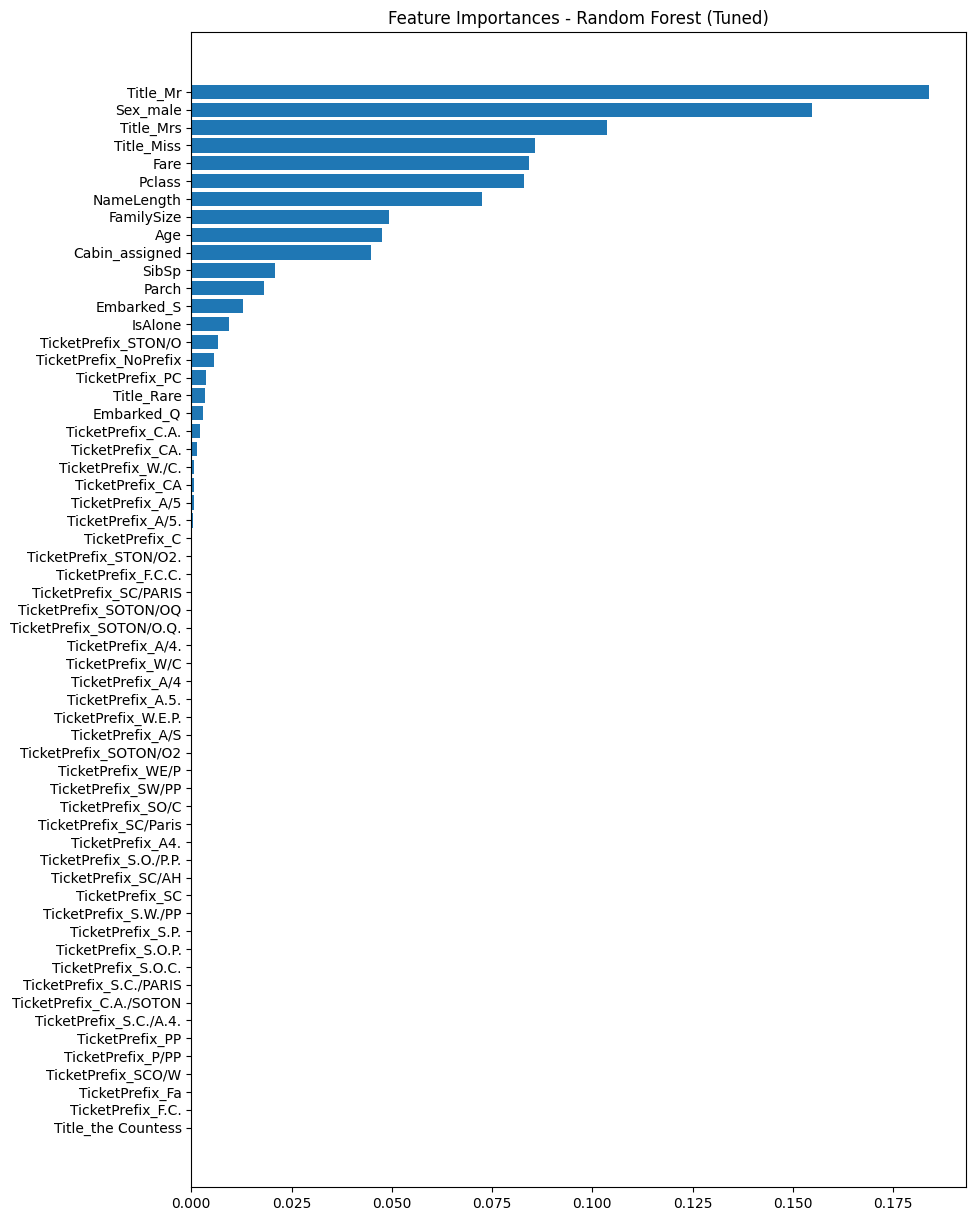

In [155]:
# Plot feature importances for the best_rf_model after tuning
importances_rf = best_rf_model.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]

plt.figure(figsize=(10, 15))
plt.title("Feature Importances - Random Forest (Tuned)")
plt.barh(range(len(indices_rf)), importances_rf[indices_rf], align="center")
plt.yticks(range(len(indices_rf)), [features[i] for i in indices_rf])
plt.gca().invert_yaxis()
plt.show()

In [156]:
# Initialize other models
gb_model = GradientBoostingClassifier(random_state=42)
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [157]:
# Voting ensemble with slight weight adjustment
ensemble_model = VotingClassifier(
    estimators=[('rf', best_rf_model), ('gb', gb_model), ('dt', dt_model)],
    voting='soft',
    weights=[2, 3, 1]  # Adjusted weights
)

# Fit the voting model
ensemble_model.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=False,
                                                     max_depth=15,
                                                     min_samples_leaf=4,
                                                     min_samples_split=10,
                                                     random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(random_state=42)),
                             ('dt',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=5,
                                                     random_state=42))],
                 voting='soft', weights=[2, 3, 1])

In [158]:
# Evaluate ensemble model
y_pred_ensemble = ensemble_model.predict(X_val)

print("Ensemble Model Accuracy on Validation Set:", accuracy_score(y_val, y_pred_ensemble))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred_ensemble))
print("\nClassification Report:\n", classification_report(y_val, y_pred_ensemble))

Ensemble Model Accuracy on Validation Set: 0.8268156424581006

Confusion Matrix:
 [[92 13]
 [18 56]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



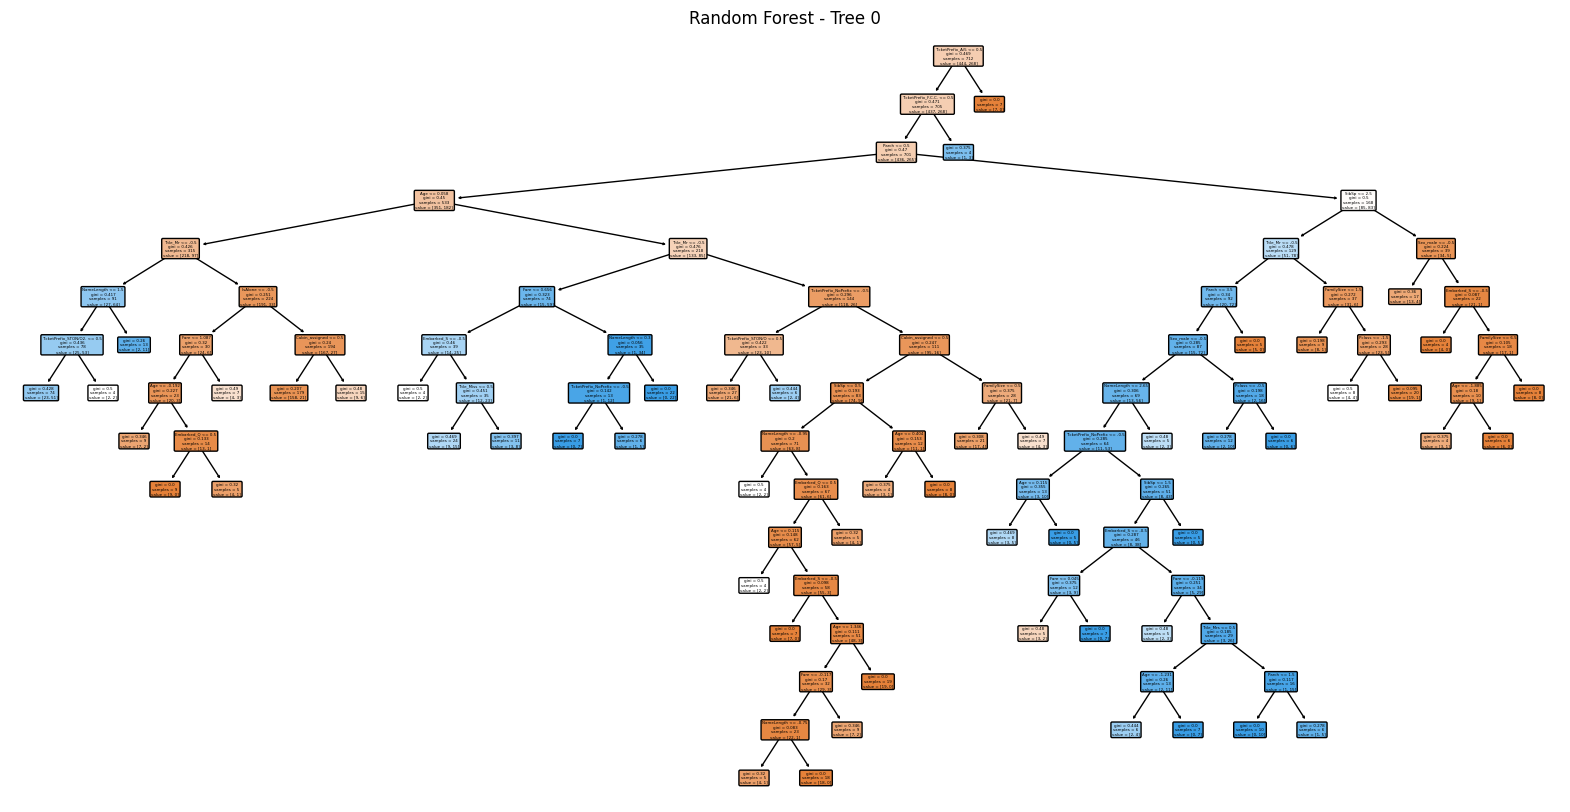

In [159]:
# Plot a single tree from the Random Forest
plt.figure(figsize=(20, 10))
plot_tree(best_rf_model.estimators_[0], feature_names=features, filled=True, rounded=True)
plt.title("Random Forest - Tree 0")
plt.show()

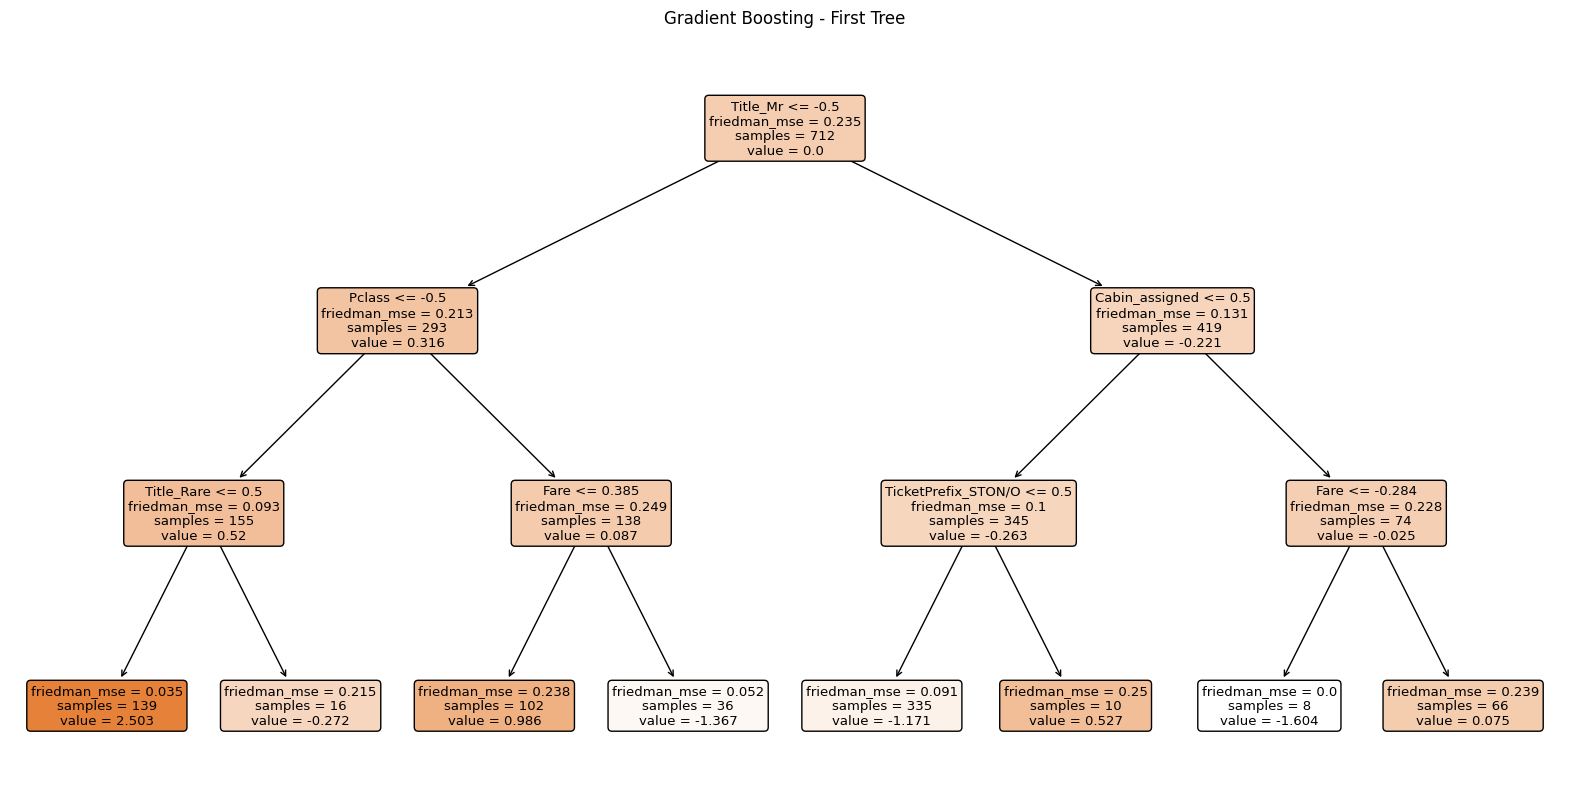

In [160]:
# Plot a single tree from the Gradient Boosting model
plt.figure(figsize=(20, 10))
plot_tree(best_gb_model.estimators_[0][0], feature_names=features, filled=True, rounded=True)
plt.title("Gradient Boosting - First Tree")
plt.show()

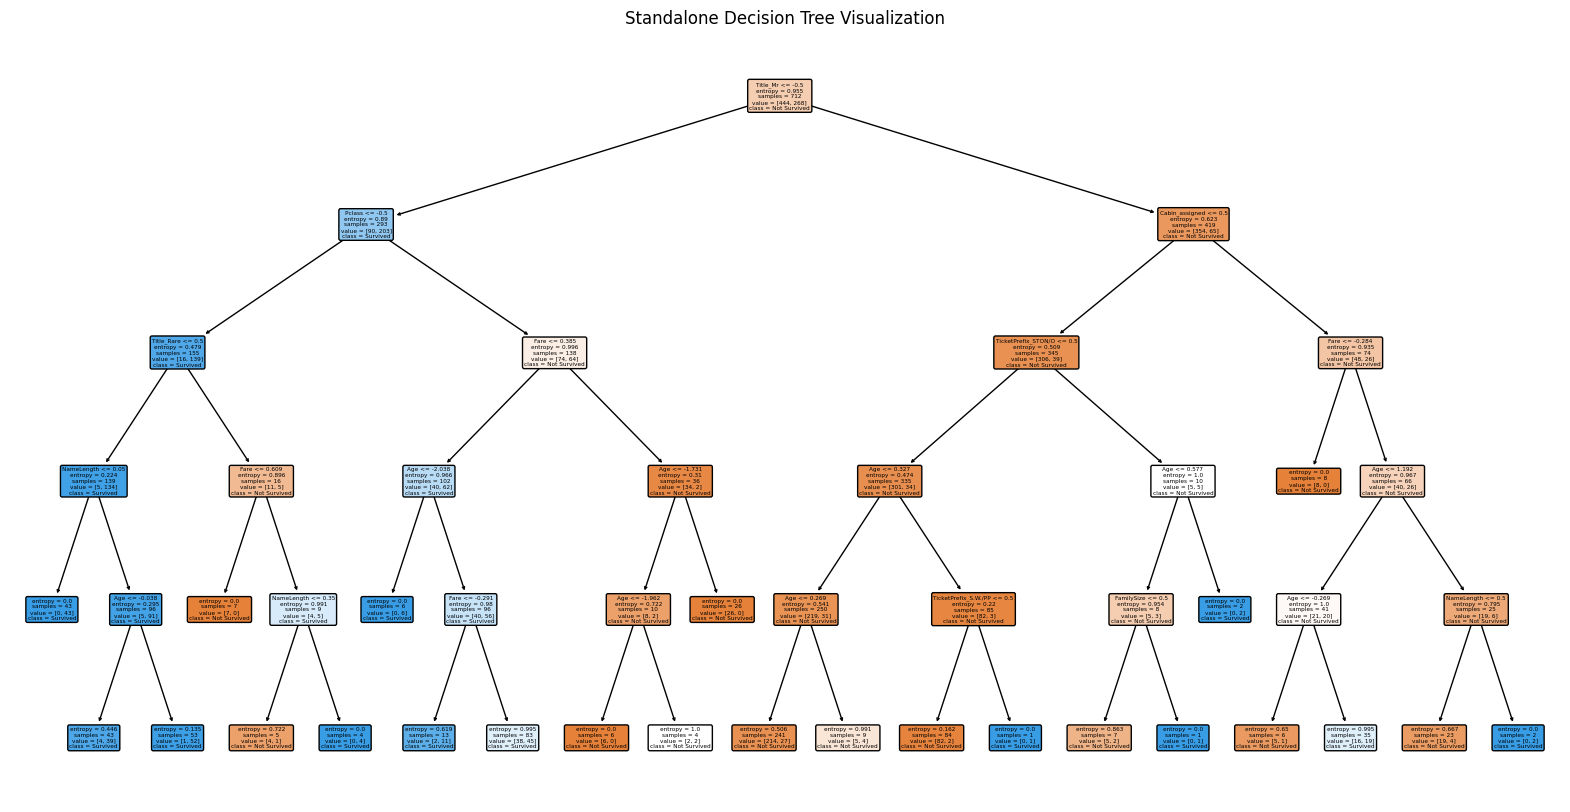

In [161]:
# Fit the standalone Decision Tree model
dt_model.fit(X_train, y_train)

# Plot the standalone Decision Tree used in the ensemble
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=features, class_names=['Not Survived', 'Survived'], filled=True, rounded=True)
plt.title("Standalone Decision Tree Visualization")
plt.show()


In [162]:
# Calculate feature importances and display the top two most important features
feature_importances = pd.Series(dt_model.feature_importances_, index=features)
top_features = feature_importances.sort_values(ascending=False).head(2)
print("Top Two Splitting Features:\n", top_features)

Top Two Splitting Features:
 Title_Mr    0.452041
Pclass      0.139532
dtype: float64


Would Gini be appropriate here as well? Why?

- Yes, Gini would be appropriate here as well. Both Gini and Entropy measure impurity in nodes and usually produce similar tree structures. Gini is faster to compute because it avoids logarithmic calculations, making it better suited for larger datasets. For smaller datasets like the Titanic, the choice between Gini and Entropy often has little impact on performance. In practice, Gini is often preferred for its efficiency, although Entropy may provide slightly more balanced splits in some cases.

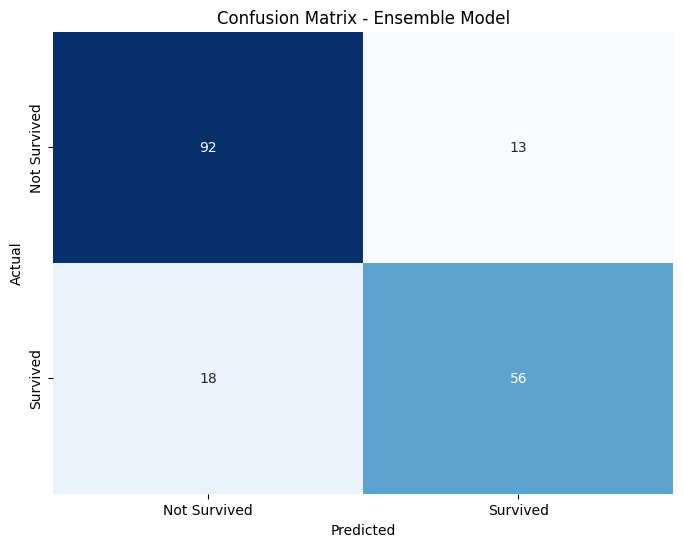

In [163]:
# Plot the Confusion Matrix for the ensemble model on the validation set
conf_matrix = confusion_matrix(y_val, y_pred_ensemble)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Ensemble Model")
plt.show()

In [164]:
# Cross-validation for more robust evaluation
cv_scores = cross_val_score(ensemble_model, X_scaled, y, cv=10, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", np.mean(cv_scores))

Cross-validation scores: [0.78888889 0.83146067 0.75280899 0.87640449 0.85393258 0.82022472
 0.83146067 0.78651685 0.86516854 0.82022472]
Mean CV score: 0.82270911360799


In [165]:
# Loop through max depths from 1 to 20
for depth in range(1, 21):
    # Initialize Decision Tree with Gini
    tree_gini = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=42)
    # Perform 5-fold cross-validation and calculate mean and std for Gini
    scores_gini = cross_val_score(tree_gini, X_train, y_train, cv=5, scoring='accuracy')
    print("\nGini - Max depth:%d, Accuracy: %0.3f (+/- %0.3f)" % (depth, scores_gini.mean(), scores_gini.std() * 2))
    
    # Initialize Decision Tree with Entropy
    tree_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    # Perform 5-fold cross-validation and calculate mean and std for Entropy
    scores_entropy = cross_val_score(tree_entropy, X_train, y_train, cv=5, scoring='accuracy')
    print("Entropy - Max depth:%d, Accuracy: %0.3f (+/- %0.3f) \n" % (depth, scores_entropy.mean(), scores_entropy.std() * 2))


Gini - Max depth:1, Accuracy: 0.775 (+/- 0.078)
Entropy - Max depth:1, Accuracy: 0.778 (+/- 0.079) 


Gini - Max depth:2, Accuracy: 0.791 (+/- 0.048)
Entropy - Max depth:2, Accuracy: 0.793 (+/- 0.035) 


Gini - Max depth:3, Accuracy: 0.810 (+/- 0.055)
Entropy - Max depth:3, Accuracy: 0.822 (+/- 0.041) 


Gini - Max depth:4, Accuracy: 0.791 (+/- 0.063)
Entropy - Max depth:4, Accuracy: 0.812 (+/- 0.055) 


Gini - Max depth:5, Accuracy: 0.782 (+/- 0.045)
Entropy - Max depth:5, Accuracy: 0.800 (+/- 0.046) 


Gini - Max depth:6, Accuracy: 0.805 (+/- 0.042)
Entropy - Max depth:6, Accuracy: 0.805 (+/- 0.040) 


Gini - Max depth:7, Accuracy: 0.791 (+/- 0.044)
Entropy - Max depth:7, Accuracy: 0.802 (+/- 0.047) 


Gini - Max depth:8, Accuracy: 0.801 (+/- 0.031)
Entropy - Max depth:8, Accuracy: 0.789 (+/- 0.029) 


Gini - Max depth:9, Accuracy: 0.779 (+/- 0.044)
Entropy - Max depth:9, Accuracy: 0.788 (+/- 0.038) 


Gini - Max depth:10, Accuracy: 0.793 (+/- 0.033)
Entropy - Max depth:10, Accuracy

In [166]:
def calculate_class_probabilities(labels):
    """
    Calculate the class probabilities for a list of labels.
    """
    total_count = len(labels)
    class_counts = {}
    for label in labels:
        if label in class_counts:
            class_counts[label] += 1
        else:
            class_counts[label] = 1
    return [count / total_count for count in class_counts.values()]

In [167]:
def entropy(labels):
    """
    Calculate the entropy for a list of labels.
    """
    class_probs = calculate_class_probabilities(labels)
    return -sum([p * log2(p) for p in class_probs if p > 0])

In [168]:
def gini(labels):
    """
    Calculate the Gini index for a list of labels.
    """
    class_probs = calculate_class_probabilities(labels)
    return 1 - sum([p ** 2 for p in class_probs])

In [169]:
# Calculate Entropy and Gini for the target variable 'Survived'
print("Entropy of target variable:", entropy(y))
print("Gini index of target variable:", gini(y))

Entropy of target variable: 0.9607079018756469
Gini index of target variable: 0.4730129578614428


In [171]:
# Test cases
test_cases = [
    [1, 2, 2, 3, 3, 3],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [2, 3]
]

# Calculate and print entropy for each test case
for i, case in enumerate(test_cases, 1):
    print(f"Entropy of test case {i} ({case}): {entropy(case)}")

Entropy of test case 1 ([1, 2, 2, 3, 3, 3]): 1.4591479170272448
Entropy of test case 2 ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]): -0.0
Entropy of test case 3 ([2, 3]): 1.0


In [172]:
# Calculate and print Gini index for each test case
for i, case in enumerate(test_cases, 1):
    print(f"Gini index of test case {i} ({case}): {gini(case)}")

Gini index of test case 1 ([1, 2, 2, 3, 3, 3]): 0.6111111111111112
Gini index of test case 2 ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]): 0.0
Gini index of test case 3 ([2, 3]): 0.5


In [170]:
# Make predictions on the test set
test_predictions = ensemble_model.predict(test_data_scaled)

# Create a submission file for Kaggle
submission = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': test_predictions})
submission.to_csv('submission.csv', index=False)
print("Submission file created: submission.csv")

Submission file created: submission.csv
